# 5 Graphs in Finance

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import copy

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


# Set path for generated figures
fig_path = './figures_5/'

<a id='5.1'></a>
## 5.1 S&P 500 Stock Selection

This section involves applying graphs to model and visualize the relationship between stocks within the S\&P 500 index.

In [2]:
# Read data
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d")
snp = pd.read_csv("snp_allstocks_2015_2019.csv", index_col='Date', parse_dates=True, date_parser=mydateparser)
info = pd.read_csv('snp_info.csv', index_col=0)

In [3]:
info_fin = info[info['GICS Sector'] == 'Financials']
info_fin_NY = info_fin[info_fin['Headquarters Location'] == 'New York, New York']
info_fin_NY.sort_values('GICS Sub Industry')

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
74,BlackRock,BLK,reports,Financials,Asset Management & Custody Banks,"New York, New York",2011-04-04,1364742,NaN
67,The Bank of New York Mellon Corp.,BK,reports,Financials,Asset Management & Custody Banks,"New York, New York",1995-03-31,1390777,NaN
33,American Express Co,AXP,reports,Financials,Consumer Finance,"New York, New York",1976-06-30,4962,1850
117,Citigroup Inc.,C,reports,Financials,Diversified Banks,"New York, New York",1988-05-31,831001,NaN
273,JPMorgan Chase & Co.,JPM,reports,Financials,Diversified Banks,"New York, New York",1975-06-30,19617,NaN
423,"S&P Global, Inc.",SPGI,reports,Financials,Financial Exchanges & Data,"New York, New York",NaN,64040,NaN
329,Moody's Corp,MCO,reports,Financials,Financial Exchanges & Data,"New York, New York",NaN,1059556,1909
333,MSCI Inc,MSCI,reports,Financials,Financial Exchanges & Data,"New York, New York",2018-04-04,1408198,NaN
335,"Nasdaq, Inc.",NDAQ,reports,Financials,Financial Exchanges & Data,"New York, New York",2008-10-22,1120193,NaN
307,Marsh & McLennan,MMC,reports,Financials,Insurance Brokers,"New York, New York",1987-08-31,62709,NaN


The market capitilization of each of the companies (excluding JEF and ETFC) is given as 

**Asset Management & Custody Banks:**
- BlackRock: 124.641B
- The Bank of New York Mellon Corp.: 40.342B

**Consumer Finance:**
- American Express Co: 120.505B

**Diversified Banks:**
- Citigroup Inc.: 151.369B
- JPMorgan Chase & Co.: 464.054B

**Financial Exchanges & Data:**
- S&P Global, Inc.: 90.35B
- Moody's Corp: 58.984B
- MSCI Inc: 39.184B
- Nasdaq, Inc.: 26.395B

**Insurance Brokers:**
- Marsh & McLennan: 64.68B

**Investment Banking & Brokerage:**
- Goldman Sachs Group: 115.18B
- Morgan Stanley: 151.177B

**Life & Health Insurance:**
- MetLife Inc.: 55.558B

**Multi-line Insurance:**
- Loews Corp.: 14.43B
- Assurant Inc.: 8.690B

**Property & Casualty Insurance:**
- American International Group: 40.62B
- The Travelers Companies Inc.: 39.22B

The selected companies are BlackRock, American Express Co, JPMorgan Chase & Co., Citigroup Inc., S&P Global, Inc., Marsh & McLennan, Morgan Stanley, Goldman Sachs Group, MetLife Inc., American International Group, which are the largest companies in terms of mcap in their GICS Sub Industry. In order to choose 10 companies and to include Goldman Sachs Group and Citigroup Inc., which may be more relevant in this analysis, we have excluded a few companies.

In [4]:
stocks = ['BLK', 'AXP', 'JPM', 'C', 'SPGI', 'MMC', 'MS', 'GS', 'MET', 'AIG']
info_fin_NY.set_index('Symbol').loc[stocks]

,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
Symbol,,,,,,,,
BLK,BlackRock,reports,Financials,Asset Management & Custody Banks,"New York, New York",2011-04-04,1364742,NaN
AXP,American Express Co,reports,Financials,Consumer Finance,"New York, New York",1976-06-30,4962,1850
JPM,JPMorgan Chase & Co.,reports,Financials,Diversified Banks,"New York, New York",1975-06-30,19617,NaN
C,Citigroup Inc.,reports,Financials,Diversified Banks,"New York, New York",1988-05-31,831001,NaN
SPGI,"S&P Global, Inc.",reports,Financials,Financial Exchanges & Data,"New York, New York",NaN,64040,NaN
MMC,Marsh & McLennan,reports,Financials,Insurance Brokers,"New York, New York",1987-08-31,62709,NaN
MS,Morgan Stanley,reports,Financials,Investment Banking & Brokerage,"New York, New York",NaN,895421,1935
GS,Goldman Sachs Group,reports,Financials,Investment Banking & Brokerage,"New York, New York",2002-07-22,886982,NaN
MET,MetLife Inc.,reports,Financials,Life & Health Insurance,"New York, New York",NaN,1099219,1868


In [5]:
logpx = np.log(snp[stocks])
returns = logpx.diff().dropna()

We select 10 stocks to analyze in this section from the S\&P 500. We decide to analyze stocks from the financial sector and particularly those from New York. We divided the companies that fitted that criteria according to their GICS Sub Industry and selected the company/companies with largest market capitalizations from those industries. Further detail on this selection together with the mcaps of the companies is given above. The selected companies are also given above.

The chosen financial institutions have intricate relationships, which are often affected by same macroeconomic factors. Since the location of the headquarters is limited to New York, the companies are largely affected by the same regulations and other geographical and socioeconomic factors. Finally, by including companies both from different and same sub industries, we can observe the relationship across and within sub industries.

<a id='5.2'></a>
## 5.2 Visualising Stock Correlations with Graphs

Graphs allow visualization of the underlying relationships in the given data. A graph with $N$ vertices is defined by its adjacency matrix $\mathbf{A} \in \mathbb{R}^{N \times N}$, where the element $\mathbf{A}_{ij}$ denotes the weight of the edge between vertices $i$ and $j$. Note that an undirected graph has a symmetric adjacency matrix, where $\mathbf{A}_{ij} = \mathbf{A}_{ji}$.

The weight of an edge represents the strength of the connection/relationship between the vertices. Correlation between assets is a quantitative indication of their relationship, so here, we use the correlation matrix of the 10 considered stocks (given in below) as the adjacency matrix of the graph given in the figure below. Therefore, the correlation between the stocks $i$ and $j$ defines the weight of the edge between vertices $i$ and $j$.

Observe that in the figure below, the strength of an edge is represented by its thickness and the darkness of its color, the importance of a vertex is represented by its size, and the vertices are positioned in such a way that the strongly connected vertices are closer to each other; more detail on this in [5.3](#5.3). Also note that the edges with weights less than 0.5 are removed (*minimum cut*).

[Visualising stocks correlations with Networkx](https://towardsdatascience.com/visualising-stocks-correlations-with-networkx-88f2ee25362e) by Valeria Cortez was useful in this section.

In [6]:
corr_matrix = returns.corr()
corr_matrix

,BLK,AXP,JPM,C,SPGI,MMC,MS,GS,MET,AIG
BLK,1.000000,0.523309,0.719505,0.723413,0.649981,0.637921,0.729031,0.688928,0.643319,0.556012
AXP,0.523309,1.000000,0.583079,0.574842,0.462673,0.469991,0.577062,0.559470,0.495523,0.435220
JPM,0.719505,0.583079,1.000000,0.887535,0.610638,0.626700,0.865723,0.836598,0.751688,0.644480
C,0.723413,0.574842,0.887535,1.000000,0.592265,0.587256,0.856974,0.824291,0.750710,0.637896
SPGI,0.649981,0.462673,0.610638,0.592265,1.000000,0.586513,0.617912,0.594903,0.504903,0.459869
MMC,0.637921,0.469991,0.626700,0.587256,0.586513,1.000000,0.596269,0.581445,0.546175,0.531102
MS,0.729031,0.577062,0.865723,0.856974,0.617912,0.596269,1.000000,0.865439,0.746946,0.617307
GS,0.688928,0.559470,0.836598,0.824291,0.594903,0.581445,0.865439,1.000000,0.698780,0.597581
MET,0.643319,0.495523,0.751688,0.750710,0.504903,0.546175,0.746946,0.698780,1.000000,0.659178
AIG,0.556012,0.435220,0.644480,0.637896,0.459869,0.531102,0.617307,0.597581,0.659178,1.000000


In [7]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

In [8]:
#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)

In [9]:
#function to create and display networks from the correlatin matrix. 

def create_corr_network(G, min_correlation, ax):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some 
    for stock1, stock2, weight in G.edges(data=True):
        ####If correlation weaker than the min, then it deletes the edge
        if weight["weight"] < min_correlation:
            H.remove_edge(stock1, stock2)
    
    #crates a list for the edges and the weights
    edges, weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    
    
    #positions
    positions=nx.spring_layout(H)
    
    
    #####calculates the degree of each node
    d = nx.degree(H)
    
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*dict(d).items())
    
    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist, ax=ax,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, ax=ax,
                            font_family='sans-serif')
    
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    edge_colour = plt.cm.GnBu 
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid', ax=ax,
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    ax.axis('off')

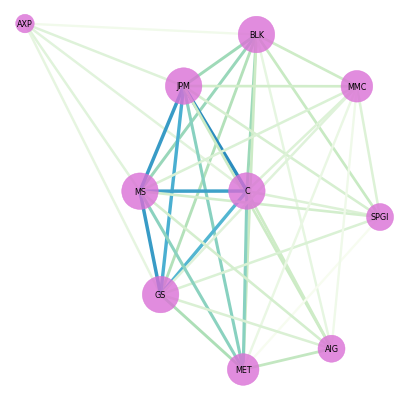

In [10]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0.5, ax)

# fig.savefig(fig_path+'Returns_correlation_graph.png', dpi=200, bbox_inches='tight')

<a id='5.3'></a>
## 5.3 Graph Analysis

Note that in the figure above, the nodes are positioned in such a way that ones with strong connections are closer to each other, and the others are further apart. For example, observe that JPM, MS, GS, and C are strongly correlated with each other and therefore close to each other. On the other hand, AXP with weaker connections is positioned further apart from the rest of the nodes. This positioning indicates that the companies within the same GICS Sub Industry are more correlated with each other and gives insights on which sub-industries are relatively less correlated.

The positioning of the nodes is done using the Fruchterman-Reingold force-directed algorithm, which simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, and the simulation continues until the positions are close to an equilibrium. Furthermore, the edges are styled in such a way that the ones with larger weights are darker and thicker, while the others are lighter and thinner.

The degree of a node is defined by the number of edges it has and represents the importance of a node within the graph. The graph in the figure above illustrates this importance by changing the size of the nodes, meaning the nodes with higher degrees are larger than the others. For example, note that the largest nodes are JPM and C, which are both diversified banks; this makes sense as the diversified nature of their operations makes these institutions correlated with more companies within the financial sector.

Finally, we note the fact that the re-ordering of the graph vertices or the re-ordering of the timer-series wouldn't have affected the constructed graph. As previously mentioned, a graph is defined by its adjacency matrix, where each column or row represents a certain vertex, and each element in the adjacency matrix represents the weight of the edge between vertices. Therefore, the re-ordering of the vertices would change the position of the elements in this matrix but not their values and would not affect the resulting graph. Therefore, graphs are *isomorphic domains*. Furthermore, because the re-ordering of the time series data wouldn't have changed the corresponding correlation matrix, this wouldn't affect the resulting graph either. To prove this point empirically, we re-order the graph vertices and the times-series data and generate the graph given in the figure below, which exhibits a similar topology with exact same connections.

In [11]:
shuffled_returns = returns.sample(frac=1, axis=0).sample(frac=1, axis=1)
corr_matrix = shuffled_returns.corr()
corr_matrix

,AXP,MET,BLK,SPGI,GS,AIG,C,MMC,JPM,MS
AXP,1.000000,0.495523,0.523309,0.462673,0.559470,0.435220,0.574842,0.469991,0.583079,0.577062
MET,0.495523,1.000000,0.643319,0.504903,0.698780,0.659178,0.750710,0.546175,0.751688,0.746946
BLK,0.523309,0.643319,1.000000,0.649981,0.688928,0.556012,0.723413,0.637921,0.719505,0.729031
SPGI,0.462673,0.504903,0.649981,1.000000,0.594903,0.459869,0.592265,0.586513,0.610638,0.617912
GS,0.559470,0.698780,0.688928,0.594903,1.000000,0.597581,0.824291,0.581445,0.836598,0.865439
AIG,0.435220,0.659178,0.556012,0.459869,0.597581,1.000000,0.637896,0.531102,0.644480,0.617307
C,0.574842,0.750710,0.723413,0.592265,0.824291,0.637896,1.000000,0.587256,0.887535,0.856974
MMC,0.469991,0.546175,0.637921,0.586513,0.581445,0.531102,0.587256,1.000000,0.626700,0.596269
JPM,0.583079,0.751688,0.719505,0.610638,0.836598,0.644480,0.887535,0.626700,1.000000,0.865723
MS,0.577062,0.746946,0.729031,0.617912,0.865439,0.617307,0.856974,0.596269,0.865723,1.000000


In [12]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)

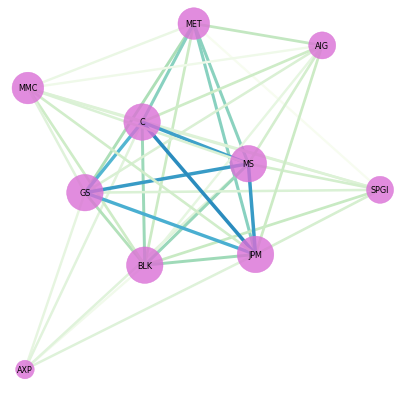

In [13]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0.5, ax)

# fig.savefig(fig_path+'Returns_correlation_graph_reordered.png', dpi=200, bbox_inches='tight')

<a id='5.4'></a>
## 5.4 Spectral Similarity Graph

In the previous sections, we had constructed the graphs using the correlations between the returns of assets. In this section we will use the spectral similarity of the return series of different assets to construct a graph. The spectra of each asset is plotted in the figure below, and the graph defined by the correlation matrix of the spectras is given in the following figure. Note that the edges with weights less than 0.25 are removed, see previous sections for detail on this.

The motivation for using this measure is the fact that companies undergo certain business and economic cycles which can affect their returns. It is possible to visualize the similarity of the firms in this sense, that is which firms are affected by similar economic cycles, with a graph. Note the weakness of the connections to AXP and its position among the other vertices. Also observe the strong connections between JPM, C, GS, MS which indicate they're affected by similar business cycles. Also note the closeness of AIG and MET, which are both insurance firms, indicating that the insurance sector has its own particular business cycles.

In [14]:
freqs = np.fft.fftfreq(len(returns.index), d=1)
PSs = pd.DataFrame(index=freqs, columns=returns.columns)

for stock in returns.columns:
    PSs[stock] = abs(np.fft.fft(returns[stock]))**2

Text(45.0, 0.5, 'Power')

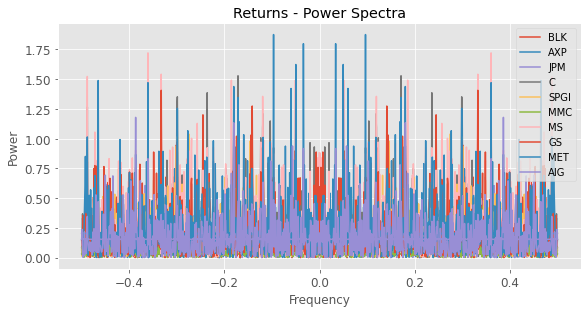

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)


PSs.plot(ax=ax, fontsize=12)
ax.set_title('Returns - Power Spectra')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power')


# fig.savefig(fig_path+'Returns_Power_Spectra.eps', dpi=200, bbox_inches='tight')

In [16]:
corr_matrix = PSs.corr()
corr_matrix

,BLK,AXP,JPM,C,SPGI,MMC,MS,GS,MET,AIG
BLK,1.000000,0.147365,0.466777,0.490946,0.401535,0.412731,0.511524,0.471258,0.331406,0.258357
AXP,0.147365,1.000000,0.309494,0.277420,0.125683,0.146337,0.263841,0.271138,0.186115,0.195091
JPM,0.466777,0.309494,1.000000,0.814169,0.356665,0.403926,0.717684,0.701042,0.509668,0.418272
C,0.490946,0.277420,0.814169,1.000000,0.324404,0.358711,0.727035,0.666742,0.551179,0.426483
SPGI,0.401535,0.125683,0.356665,0.324404,1.000000,0.349122,0.353108,0.269215,0.214902,0.199512
MMC,0.412731,0.146337,0.403926,0.358711,0.349122,1.000000,0.339972,0.296282,0.267499,0.291693
MS,0.511524,0.263841,0.717684,0.727035,0.353108,0.339972,1.000000,0.749223,0.516756,0.384318
GS,0.471258,0.271138,0.701042,0.666742,0.269215,0.296282,0.749223,1.000000,0.436883,0.345499
MET,0.331406,0.186115,0.509668,0.551179,0.214902,0.267499,0.516756,0.436883,1.000000,0.489152
AIG,0.258357,0.195091,0.418272,0.426483,0.199512,0.291693,0.384318,0.345499,0.489152,1.000000


In [17]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)

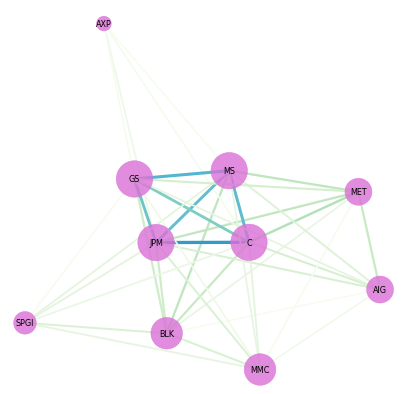

In [18]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0.25, ax)

# fig.savefig(fig_path+'Returns_Power_Spectra_Graph.png', dpi=200, bbox_inches='tight')

In the previous section, we mentioned that the re-ordering of the time-series doesn't have an affect on the construction of the graph. This is not the case for the spectral graph constructed in this section because when the time-series is re-ordered, its spectra changes as it can be seen in the figure below. Then, the values in the correlation matrix calculated for these spectra also changes, which as a result affects the weights of the graph to be constructed. We have the graph for the re-ordered series in the figure below, which is similar to the graph we previously had, but it does have some discrepancies. Note that the re-ordering of the vertices still won't have any affects on the graph properties.

In [19]:
#shuffled returns

Text(45.0, 0.5, 'Power')

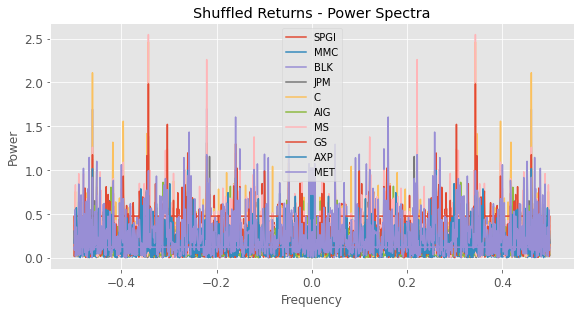

In [20]:
shuffled_returns = returns.sample(frac=1, axis=0).sample(frac=1, axis=1)

freqs = np.fft.fftfreq(len(shuffled_returns.index), d=1)
PSs = pd.DataFrame(index=freqs, columns=shuffled_returns.columns)

for stock in shuffled_returns.columns:
    PSs[stock] = abs(np.fft.fft(shuffled_returns[stock]))**2

fig, ax = plt.subplots(1,1, figsize=(8,4))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)


PSs.plot(ax=ax, fontsize=12)
ax.set_title('Shuffled Returns - Power Spectra')
ax.set_xlabel('Frequency')
ax.set_ylabel('Power')


# fig.savefig(fig_path+'Returns_Power_Spectra_Reordered.eps', dpi=200, bbox_inches='tight')

In [21]:
corr_matrix = PSs.corr()
corr_matrix

,SPGI,MMC,BLK,JPM,C,AIG,MS,GS,AXP,MET
SPGI,1.000000,0.368866,0.435077,0.386194,0.370432,0.280044,0.374889,0.366208,0.233313,0.254730
MMC,0.368866,1.000000,0.430496,0.417012,0.317240,0.280677,0.371632,0.341705,0.228638,0.237846
BLK,0.435077,0.430496,1.000000,0.554965,0.560586,0.314474,0.582870,0.516563,0.313844,0.386629
JPM,0.386194,0.417012,0.554965,1.000000,0.799431,0.400520,0.761576,0.723579,0.334816,0.534442
C,0.370432,0.317240,0.560586,0.799431,1.000000,0.336815,0.771181,0.715460,0.345921,0.519783
AIG,0.280044,0.280677,0.314474,0.400520,0.336815,1.000000,0.372428,0.387906,0.235243,0.413989
MS,0.374889,0.371632,0.582870,0.761576,0.771181,0.372428,1.000000,0.778440,0.296666,0.571367
GS,0.366208,0.341705,0.516563,0.723579,0.715460,0.387906,0.778440,1.000000,0.336320,0.481547
AXP,0.233313,0.228638,0.313844,0.334816,0.345921,0.235243,0.296666,0.336320,1.000000,0.238040
MET,0.254730,0.237846,0.386629,0.534442,0.519783,0.413989,0.571367,0.481547,0.238040,1.000000


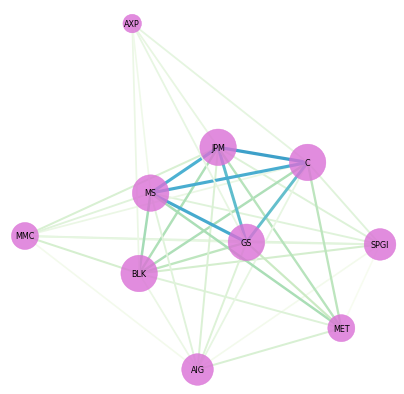

In [22]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)

fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0.25, ax)

# fig.savefig(fig_path+'Returns_Power_Spectra_Graph_Reordered.png', dpi=200, bbox_inches='tight')

<a id='5.5'></a>
## 5.5 Using Prices vs. Returns for Graph Construction

We have the graph constructed by using the correlation matrix of prices in the figure below. Compared to graphs generated using returns, this doesn't convey much information about the intrinsic relationships of the considered firms. It rather gives little information about the general trends in the signals. Note that we remove the edges with negative weights.

In [23]:
returns.corr()

,BLK,AXP,JPM,C,SPGI,MMC,MS,GS,MET,AIG
BLK,1.000000,0.523309,0.719505,0.723413,0.649981,0.637921,0.729031,0.688928,0.643319,0.556012
AXP,0.523309,1.000000,0.583079,0.574842,0.462673,0.469991,0.577062,0.559470,0.495523,0.435220
JPM,0.719505,0.583079,1.000000,0.887535,0.610638,0.626700,0.865723,0.836598,0.751688,0.644480
C,0.723413,0.574842,0.887535,1.000000,0.592265,0.587256,0.856974,0.824291,0.750710,0.637896
SPGI,0.649981,0.462673,0.610638,0.592265,1.000000,0.586513,0.617912,0.594903,0.504903,0.459869
MMC,0.637921,0.469991,0.626700,0.587256,0.586513,1.000000,0.596269,0.581445,0.546175,0.531102
MS,0.729031,0.577062,0.865723,0.856974,0.617912,0.596269,1.000000,0.865439,0.746946,0.617307
GS,0.688928,0.559470,0.836598,0.824291,0.594903,0.581445,0.865439,1.000000,0.698780,0.597581
MET,0.643319,0.495523,0.751688,0.750710,0.504903,0.546175,0.746946,0.698780,1.000000,0.659178
AIG,0.556012,0.435220,0.644480,0.637896,0.459869,0.531102,0.617307,0.597581,0.659178,1.000000


In [24]:
corr_matrix = logpx.corr()
corr_matrix

,BLK,AXP,JPM,C,SPGI,MMC,MS,GS,MET,AIG
BLK,1.000000,0.783670,0.892168,0.859566,0.910314,0.858636,0.852563,0.776993,0.546137,-0.024006
AXP,0.783670,1.000000,0.838891,0.883232,0.808664,0.713383,0.881191,0.769254,0.640400,-0.234708
JPM,0.892168,0.838891,1.000000,0.904992,0.950498,0.932230,0.893102,0.823562,0.552220,-0.092348
C,0.859566,0.883232,0.904992,1.000000,0.823201,0.782713,0.968934,0.934010,0.802213,0.151227
SPGI,0.910314,0.808664,0.950498,0.823201,1.000000,0.948569,0.810000,0.688886,0.404611,-0.215980
MMC,0.858636,0.713383,0.932230,0.782713,0.948569,1.000000,0.762701,0.668929,0.398421,-0.142358
MS,0.852563,0.881191,0.893102,0.968934,0.810000,0.762701,1.000000,0.958328,0.802494,0.132962
GS,0.776993,0.769254,0.823562,0.934010,0.688886,0.668929,0.958328,1.000000,0.851570,0.320938
MET,0.546137,0.640400,0.552220,0.802213,0.404611,0.398421,0.802494,0.851570,1.000000,0.478403
AIG,-0.024006,-0.234708,-0.092348,0.151227,-0.215980,-0.142358,0.132962,0.320938,0.478403,1.000000


In [25]:
stocks = corr_matrix.index.values
cor_matrix = np.asmatrix(corr_matrix)

#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
# G.edges(data=True)

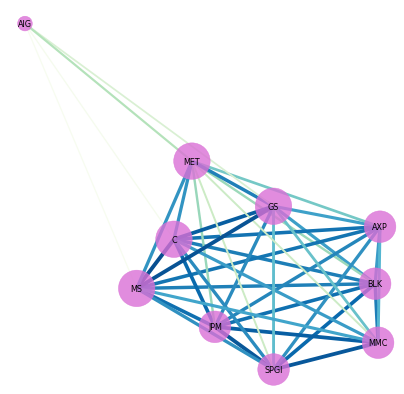

In [26]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
create_corr_network(G, 0, ax)

# fig.savefig(fig_path+'Prices_Correlaion_Graph.png', dpi=200, bbox_inches='tight')

In the figure below we have the normalized log-price signals. Observe that while most of the signals are upward trending, the price of AIG is downward trending and therefore has negative correlation with most of the other firms. This is visualized by the position of the AIG vertex in the figure above and the number of edges connected to it.

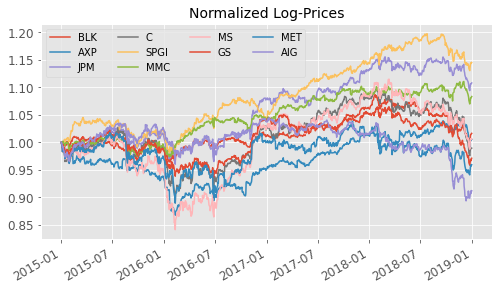

In [27]:
# general plotting convention
fig, ax = plt.subplots(1,1, figsize=(7,4))
fig.tight_layout()

(logpx/logpx.iloc[0]).plot(ax=ax, fontsize=12); 
ax.set_title("Normalized Log-Prices", fontsize=14)
ax.set_xlabel('')
ax.legend(loc='upper left', ncol=4)

# fig.savefig(fig_path+'Normalized_log_prices.eps', dpi=200, bbox_inches='tight')

Finally, because the price series have constant values in them, that is because they are not zero-mean signals, their spectra will be very high at low frequency values for all signals, making the entire analysis using spectra irrelevant. Therefore, we conclude that it would be more appropriate to use returns to conduct such analysis.